In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import fractions
import re
import string
import nltk
import spacy 
import numpy as np
import math
from tqdm import tqdm 

from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy



data=pd.read_csv("df_product_test.csv")
data

,Product,name,Category
0,Baby Trend Diaper Champ,333,Diapering
1,BABYBJORN Potty Chair - Red,232,Nursery
2,Philips Avent 3 Pack 9oz Bottles,191,Baby_care
3,Munchkin Mozart Magic Cube,191,Activity_entertainment
4,"PRIMO EuroBath, Pearl White",182,Nursery
...,...,...,...
356,Semanario (7) Little Girls 14k Gold Overlay Ba...,1,Apparel_accessories
357,Gerber Diaper Service Cloth Diapers (6-pk.),1,Diapering
358,"Large Jungle Animals (Panda, Lion, Elephant, G...",1,Baby_toddler_toys
359,Beautiful Girl and Black Flower Removable Viny...,1,Nursery


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [5]:
data_new = data.rename(columns={'total': 'name'}, index={'ONE': 'Row_1'})


In [6]:
data_new.head()


,Product,name,Category
0,Baby Trend Diaper Champ,333,Diapering
1,BABYBJORN Potty Chair - Red,232,Nursery
2,Philips Avent 3 Pack 9oz Bottles,191,Baby_care
3,Munchkin Mozart Magic Cube,191,Activity_entertainment
4,"PRIMO EuroBath, Pearl White",182,Nursery


In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [8]:
count_vec=CountVectorizer()
bow=count_vec.fit_transform(data_new['Product'])
bow=np.array(bow.todense())
bow1=count_vec.fit_transform(data_new['Category'])
bow1=np.array(bow1.todense())

In [9]:
x=bow
y=data_new['Category']

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
y

0                   Diapering
1                     Nursery
2                   Baby_care
3      Activity_entertainment
4                     Nursery
                ...          
356       Apparel_accessories
357                 Diapering
358         Baby_toddler_toys
359                   Nursery
360                 Baby_care
Name: Category, Length: 361, dtype: object

In [13]:
y=pd.factorize(y)[0]
y

array([ 0,  1,  2,  3,  1,  4,  1,  1,  5,  6,  6,  0,  1,  4,  6,  7,  6,
        6,  6,  2,  1,  1,  6,  4,  6,  6,  6,  0,  5,  5,  8,  2,  1,  8,
        2,  2,  8,  6,  6,  9,  9,  9,  4,  6,  4,  3,  4,  0,  2,  9,  8,
        2,  6,  6,  0,  6,  9,  1,  6,  9,  6,  2,  4,  1,  2, 10,  4,  4,
        4,  4,  4,  2,  4,  4,  1,  8,  2,  4,  6,  9, 11,  6,  1,  4,  6,
        6,  4,  8,  4,  2,  1,  9,  4,  4,  4,  6,  2,  6,  6,  2, 12,  6,
        4,  6,  8,  4,  8,  8,  8,  2,  1,  6,  0,  0,  2,  6,  0,  2,  7,
        3,  6,  6, 10,  0,  1,  1,  6,  2,  6, 13,  6,  2,  4,  4,  8, 10,
        1,  8,  3,  0, 10,  4,  4,  4,  2, 11,  0,  9,  4, 11,  2,  2, 13,
        4, 10,  4,  8,  4,  4,  8,  8,  9,  6, 11,  0,  8,  6,  6,  1,  5,
        6,  2,  6,  2,  2, 13,  4,  6,  6,  2,  4,  6,  1,  4,  8,  2, 10,
        6,  6, 12,  2,  6, 10, 10,  1,  2,  8,  4,  1, 13, 13,  1,  6,  6,
        1,  6,  6,  2,  8,  0,  2,  2, 13,  4,  8,  8,  6,  6,  6, 10,  6,
        2, 10, 13,  1,  1

In [14]:
data_dmatrix = xgb.DMatrix(data=x,label=y)



In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [16]:
xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)



In [17]:
xg_reg.fit(X_train,y_train)
preds=xg_reg.predict(X_test)

[12:03:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.364603


In [19]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:03:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.190956,0.113893,5.190133,0.249782
1,4.876176,0.101684,4.880048,0.256642
2,4.593209,0.097949,4.607537,0.260763
3,4.348303,0.084727,4.381157,0.257032
4,4.137926,0.084281,4.180194,0.263259


In [21]:
print((cv_results["test-rmse-mean"]).tail(1))


49    2.977655
Name: test-rmse-mean, dtype: float64


In [22]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[12:03:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
!pip3 install graphviz

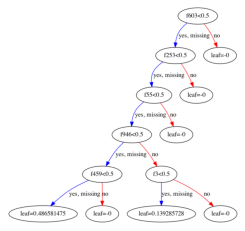

In [24]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

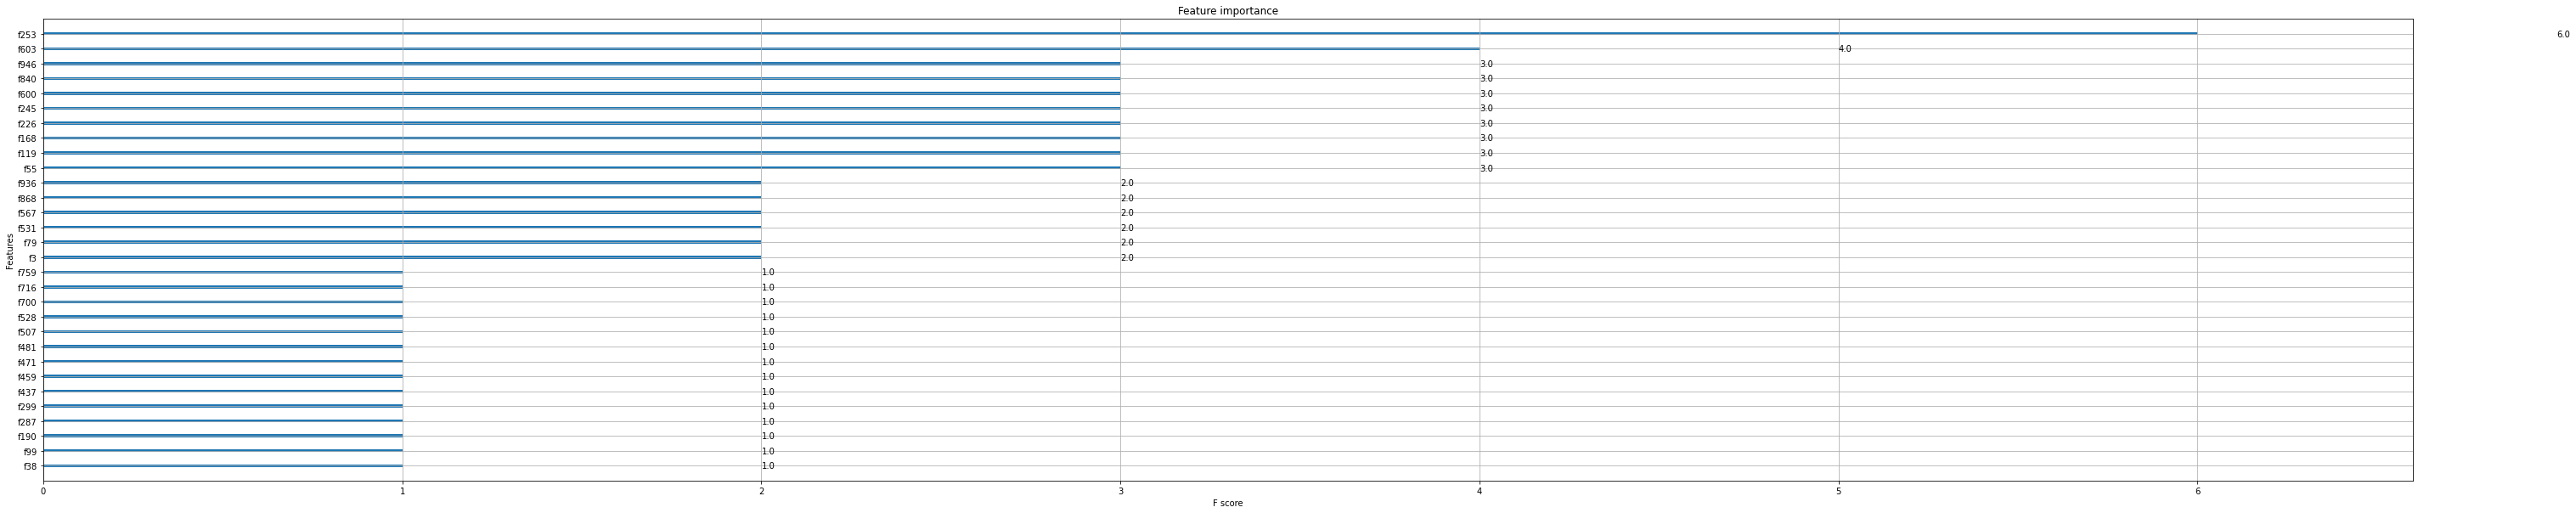

In [25]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()